In [1]:
!pip install graphviz

In [34]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
import multiprocessing

from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz,export_text, plot_tree
# 디시전트리는 과적합이 잘남(주의) 디시전리그레서 잘안씀
from sklearn import metrics
import graphviz

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# 엔트로피라는 개념, 지니계수라는 개념을 이용해 분류를 함.
# 불순도가 증가한다.
# 분류하기 전의 엔트로피와 분류후의 엔트로피가 최대가 되도록하는 것을 먼저
# 불순도가 가장 낮은 상태에서 높은 순으로 진행되는거임. 
# 1번 수행. 손톱케어 여부로 남녀 구분
# 2번 수행.. 귀걸이 착용여부
# 3번 수행.. 반지착용 여부 ....
# 나무형식으로 되어있어서 트리라고 얘기함.
# 불순도를 지표로 만든 것을 엔트로피라고 함.
# 불순도가 높을수록 특정 레벨의 데이터가 뽑힐 확률은 낮아진다.
# 엔트로피가 낮은상태에서 높은상태로 분류하는 것. = 디시전 트리

### 지니계수를 이용하여 데이터를 분할
- 지니계수 : 경제학에서 불평등지수를 나타낼 때 사용하는 것으로 0일 때 완전 평등, 1일 때 완전 불평등을 의미
- 머신러닝에서는 데이터가 다양한 값을 가질수록 평등하며 특정 값으로 쏠릴 때 불평등한 값이 됩니다.
- 다양성이 낮을수록 균일도가 높다는 의미로 1로 갈수록 균일도가 높아 지니계수가 높은 속성을 기준으로 분할

- 개념은 엔트로피랑 상당히 비슷
- 하나만있으면 불평등(엔트로피 : 불순도가 낮은 상태), 여러개 분배되어있으면 평등(엔트로피: 불순도가 높은 상태)


# 결정 트리(Decision Tree)

* 분류와 회귀에 사용되는 지도 학습 방법
* 데이터 특성으로 부터 추론된 결정 규칙을 통해 값을 예측
* **if-then-else** 결정 규칙을 통해 데이터 학습
* 트리의 깊이가 깊을 수록 복잡한 모델
* 결정 트리 장점
  * 이해와 해석이 쉽다
  * 시각화가 용이하다
  * 많은 데이터 전처리가 필요하지 않다


### Decision Tree Classifier의 파라미터

#### 핵심 파라미터

##### min_samples_split	: 노드를 분할하기 위한 최소한의 샘플 데이터수 
( 과적합을 제어하는데 사용 )
- Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가<br>
##### min_samples_leaf: 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
- min_samples_split과 함께 과적합 제어 용도<br>
- 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요<br>
##### max_features: 최적의 분할을 위해 고려할 최대 feature 개수<
- Default = None → 데이터 세트의 모든 피처를 사용<br>
- int형으로 지정 →피처 갯수 / float형으로 지정 →비중<br>
- sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정<br>
- log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정<br>
##### max_depth	: 트리의 최대 깊이<br>
- default = None<br>
→ 완벽하게 클래스 값이 결정될 때 까지 분할<br>
또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할<br>
- 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요<br>
##### max_leaf_nodes:	리프노드의 최대 개수<br>


In [4]:
iris = load_iris()

In [5]:
iris_df = pd.DataFrame( iris.data)
iris_df.columns = iris['feature_names']
iris_df['specis'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specis
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
x_data = iris['data']
y_data = iris['target']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size=0.2,
                                                    stratify=y_data,random_state=1)

In [8]:
model_tree = DecisionTreeClassifier(criterion='entropy')
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

https://www2.graphviz.org/Packages/stable/windows/10/msbuild/Release/Win32/


In [59]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [58]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
import os
os.environ['PATH']+= os.pathsep+r'C:\Program Files\Graphviz\bin'
# pathsep 이 윈도우즈에서는 ;이걸쓴다는건가?..
# r을 붙인 이유 qin 앞에 \ 때문에 
# \\ 이스케이푸 하나 더 붙여도 됨.
# 내부적으로 실행파일을 실행해서 그려주는 것.

In [10]:
export_graphviz(model_tree, out_file='tree.dot',
                class_names=iris['target_names'],
               feature_names=iris['feature_names'])
# class name은 분류 이름
# tree.dot파일이 만들어짐 

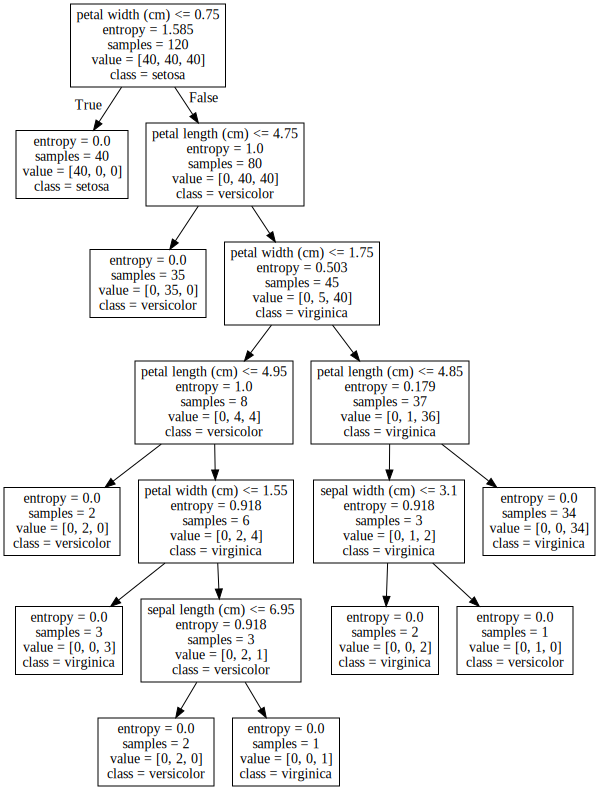

In [11]:
fp = open('./tree.dot')
dot_graph = fp.read()
graphviz.Source(dot_graph)

In [12]:
model_tree.score(x_train, y_train)

1.0

In [13]:
model_tree.score(x_test, y_test)

0.9666666666666667

In [14]:
# 특성데이터에서 중요도를 확인하자
# petal length width가 가장 높은 것을 알 수 있다.
model_tree.feature_importances_

array([0.0144845 , 0.0144845 , 0.33502994, 0.63600105])

In [15]:
import seaborn as sns

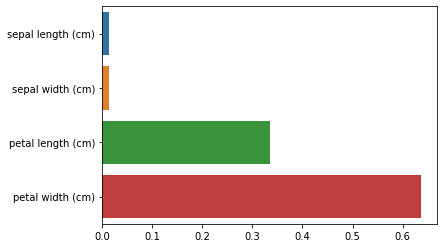

In [16]:
sns.barplot(x=model_tree.feature_importances_, y=iris['feature_names'])
plt.show()

In [17]:
# 로지스틱 미분을 이용해서 하고 딥러닝 뉴럴네트워크 분류를 씀. 요즘엔 이걸 이용하지 얘네는 잘 쓰진 않음.
# 머신러닝의 뉴럴네트워크를 적용하려면 알고리즘 자체가 미분으로 풀어야함.
# 오늘배우는 것들은 개념만 알고 있으면 될듯 실제론 잘 안씀.
# 왜 이걸 배우느냐. 이런 개념이 있었구나 라는 걸
# 현업에서 샘플코드를 보았을 때 이걸 이용했구나 라는 걸 알 수 있다.
# 오늘날은 다 딥러닝 씀

# 과적합 확인

In [18]:
from sklearn.model_selection import validation_curve

In [19]:
# 직접 validation_curve에 넣으면 에러가 나기때문에 파이프라인 써줌.
pip_tree = make_pipeline(DecisionTreeClassifier(criterion='entropy'))

In [20]:
param_range = [2,3,4,5,6,7,8,9,10] # range(2,11)

In [21]:
# pipeline을 쓰면 파이프라인 이름을 소문자로 써줌.
# f1_macro 다중분류기 때문에 넣어줌.
# maxdepth가 과적합을 볼 수 있는 가장 중요한 부분.
# default인 5인 경우 교차검증하지 않고는 7개가 나옴. 
train_score, test_score = validation_curve(estimator=pip_tree, X=x_train,
                 y=y_train,param_name='decisiontreeclassifier__max_depth',
                param_range=param_range, scoring='f1_macro',cv=5, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.0s finished


In [27]:
# 교차 검증한 결과
train_score
train_score.mean(axis=1)

array([0.96451346, 0.97077722, 0.98958181, 0.99791616, 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [23]:
# row별 평균값
test_score.mean(axis=1)


array([0.93300342, 0.94143791, 0.94156863, 0.94993464, 0.94156863,
       0.94156863, 0.94156863, 0.94156863, 0.94993464])

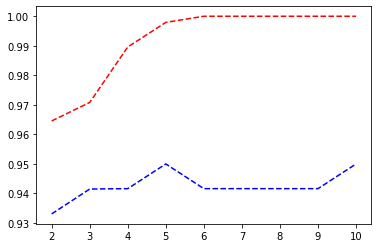

In [24]:
plt.plot(param_range, train_score.mean(axis=1), 'r--')
plt.plot(param_range, test_score.mean(axis=1), 'b--')
plt.show()

In [25]:
# max_depth별 trainset, testset점수 차이가 어떻게 나느지 본것.
# estimaotr는 pip
# cv 5 교차검증
# 오른쪽 부분은 과적합이 난것. 
# 트레인 검증셋으로 나눠서  교차검증을 실시
# train set validation set 8:2

SyntaxError: invalid syntax (<ipython-input-25-f4f47116f063>, line 2)

---
연습문제

In [35]:
cancer = load_breast_cancer()

In [38]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [37]:
print(cancer['DESCR'])
#  WDBC-Malignant
#  WDBC-Benign
# 악성, 양성

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [41]:
cancer_df = pd.DataFrame( cancer.data)
cancer_df.columns = cancer['feature_names']
cancer_df['specis'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,specis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [40]:
x_data = cancer['data']
y_data = cancer['target']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size=0.2,
                                                    stratify=y_data,random_state=1)

In [43]:
model_tree = DecisionTreeClassifier(criterion='entropy')
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [44]:
pip_tree = make_pipeline(DecisionTreeClassifier(criterion='entropy'))

In [45]:
param_range = [2,3,4,5,6,7,8,9,10]

In [46]:
train_score, test_score = validation_curve(estimator=pip_tree, X=x_train,
                 y=y_train,param_name='decisiontreeclassifier__max_depth',
                param_range=param_range, scoring='f1_macro',cv=5, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.2s finished


In [47]:
train_score
train_score.mean(axis=1)

array([0.94369065, 0.96965151, 0.98046592, 0.99243241, 0.99882611,
       1.        , 1.        , 1.        , 1.        ])

In [48]:
test_score.mean(axis=1)

array([0.91837071, 0.9361884 , 0.93367383, 0.92697299, 0.92243119,
       0.92452299, 0.91091529, 0.92447253, 0.9292608 ])

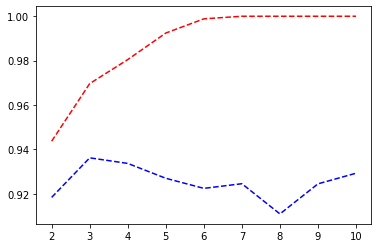

In [49]:
plt.plot(param_range, train_score.mean(axis=1), 'r--')
plt.plot(param_range, test_score.mean(axis=1), 'b--')
plt.show()

---